In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('../data/training_set_prepped.csv')
test_set = pd.read_csv('../data/test_set_prepped.csv')

# Split the data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Define the model
rf = RandomForestRegressor()


## Define the K-fold cross validator
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#
#
#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
#    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
#    'max_depth': [10, 20, 30],         # Maximum number of levels in tree
#    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
#    'bootstrap': [True, False]         # Method of selecting samples for training each tree
#}
#
#
#
## Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                           cv=kfold, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
#
## Fit the grid search to the data
#grid_search.fit(X, y)
#
## Best parameters found
#best_params = grid_search.best_params_
#
## Best estimator with the optimal settings
#best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:

#Best parameters found:
best_parameters = {'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

 #Best estimator with the optimal settings
best_rf = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=10, n_estimators=300, min_samples_leaf=1)   


In [3]:
# Predict the prices of the test_set
temp = test_set.drop('price', axis=1)
test_set['price_predicted'] = best_rf.predict(temp)

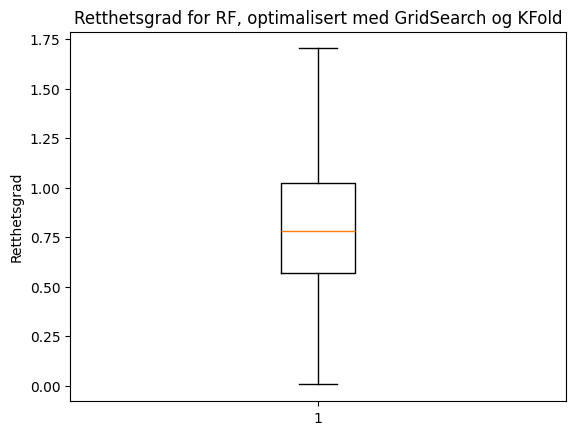

In [5]:
# create a boxplot of the predicted prices divided by the actual prices
plt.boxplot((2**test_set['price_predicted'])/(test_set['price']), showfliers=False)
plt.ylabel('Retthetsgrad')
plt.title('Retthetsgrad for RF, optimalisert med GridSearch og KFold')
plt.show()

In [6]:
best_params

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}